Disclaimer!!   
To use this notebook please download the data from [here](https://browser.stac.dataspace.copernicus.eu/collections/sentinel-1-grd/items/S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG?.language=en&.asset=asset-product) and save it in the data folder. It can be used in the compressed format directly.

In [1]:
# import the function from s1_preprocessing.py 
from s1_preprocessing import (
    read_SAFE_product,
    apply_orbit_file,
    subset_AOI,
    thermal_noise_removal,
    radiometric_calibration,
    speckle_filtering,
    terrain_correction,
    plotBand
)

In [2]:
# Define the path to your Sentinel-1 product (.SAFE or .zip)
safe_file = 'data\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.zip'

# read the file
product = read_SAFE_product(safe_file)

Reading SAR product from: data\S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG.zip...
	Product read successfully.


In [3]:
# sanity check
# get some basic information about the SNAP product object

width = product.getSceneRasterWidth()
print("Width: {} px".format(width))
height = product.getSceneRasterHeight()
print("Height: {} px".format(height))
name = product.getName()
print("Name: {}".format(name))
band_names = product.getBandNames()
print("Band names: {}".format(", ".join(band_names)))

Width: 26182 px
Height: 16680 px
Name: S1C_IW_GRDH_1SDV_20250527T181900_20250527T181925_002520_0053F6_70DB_COG
Band names: Amplitude_VH, Intensity_VH, Amplitude_VV, Intensity_VV


In [4]:
# Define AOI
bbox = [-5.65, 42.45, -5.35, 42.75]
product_subset = subset_AOI(product, bbox=bbox)

	Subsetting using bounding box: [-5.65, 42.45, -5.35, 42.75]
	Product subsetted.


In [5]:
# sanity check

width = product_subset.getSceneRasterWidth()
print("Width: {} px".format(width))
height = product_subset.getSceneRasterHeight()
print("Height: {} px".format(height))
band_names = product_subset.getBandNames()
print("Band names: {}".format(", ".join(band_names)))
band = product_subset.getBand(band_names[0])
print(band.getRasterSize())

Width: 2958 px
Height: 3643 px
Band names: Amplitude_VH, Intensity_VH, Amplitude_VV, Intensity_VV
java.awt.Dimension[width=2958,height=3643]


Band dimensions: 2958 x 3643


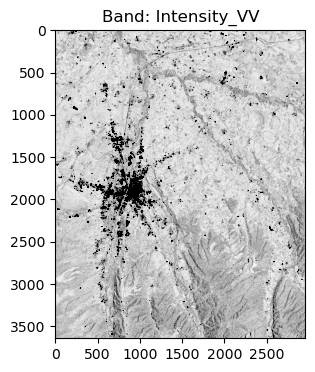

In [6]:
# visualize the subset
plotBand(product_subset, "Intensity_VV", 0, 100000, figsize = (4,4))

In [7]:
# Apply orbit file to subset 
product_orbit = apply_orbit_file(product_subset)

	Applying Orbit File...
	Orbit File applied.


In [8]:
# Thermal noise removal
product_thermal_remove = thermal_noise_removal(product_orbit)

	Performing thermal noise removal...
	Thermal noise removed.


In [9]:
# Radiometric calibration (example for VV polarization)
product_calibrated = radiometric_calibration(product_thermal_remove, polarization='VV', pols_selected='VV')

	Radiometric calibration for polarization(s): VV...
	Radiometric calibration completed.


Band names: Sigma0_VV
Band dimensions: 2958 x 3643


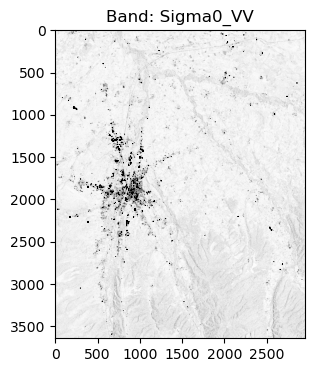

In [10]:
# view the product bands
# The data is now stored in a band called Sigma0_VV in the product object product_calibrated with a much smaller range of values.
band_names = product_calibrated.getBandNames()
print("Band names: {}".format(", ".join(band_names)))

# visualize
plotBand(product_calibrated, "Sigma0_VV", 0, 1, figsize = (4,4))

	Applying Lee speckle filter with size 5x5...
	Speckle filtering completed.
Band dimensions: 2958 x 3643


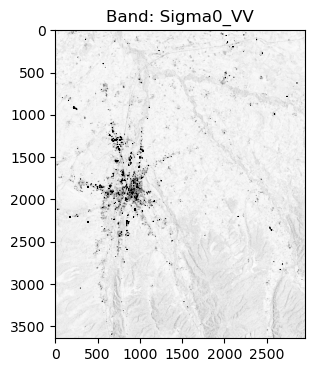

In [11]:
# Speckle filtering (i.e using the default 'Lee filter' with 5x5 window)
product_filtered = speckle_filtering(product_calibrated, filter_type='Lee', filter_size=5)

# visualize
plotBand(product_filtered, "Sigma0_VV", 0, 1, figsize = (4,4))

	Applying terrain correction with DEM: GETASSE30, pixel spacing: 10.0..
	Terrain correction completed.
Band dimensions: 4775 x 4132


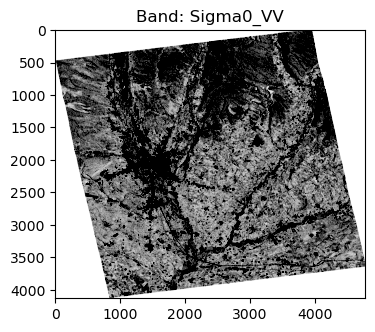

In [14]:
# Terrain correction with SRTM DEM and 10m pixel spacing
terrain_corrected = terrain_correction(product_filtered, dem_name='GETASSE30', pixel_spacing=10.0)

# visualize
plotBand(terrain_corrected, "Sigma0_VV", 0, 0.1, figsize = (4,4))